In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_train = pd.read_csv('./data/Train.csv')
df_train.shape

(23524, 13)

In [3]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df_train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [5]:
df_train.drop(['uniqueid'],axis = 1,inplace = True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [7]:
df_train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_train['gender_of_respondent']  = Lb.fit_transform(df_train['gender_of_respondent'])
df_train['relationship_with_head']  = Lb.fit_transform(df_train['relationship_with_head'])
df_train['marital_status']  = Lb.fit_transform(df_train['marital_status'])
df_train['education_level']  = Lb.fit_transform(df_train['education_level'])
df_train['job_type']  = Lb.fit_transform(df_train['job_type'])
df_train['country']  = Lb.fit_transform(df_train['country'])
df_train['bank_account']  = Lb.fit_transform(df_train['bank_account'])
df_train['cellphone_access']  = Lb.fit_transform(df_train['cellphone_access'])
df_train['location_type']  = Lb.fit_transform(df_train['location_type'])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int32
 1   year                    23524 non-null  int64
 2   bank_account            23524 non-null  int32
 3   location_type           23524 non-null  int32
 4   cellphone_access        23524 non-null  int32
 5   household_size          23524 non-null  int64
 6   age_of_respondent       23524 non-null  int64
 7   gender_of_respondent    23524 non-null  int32
 8   relationship_with_head  23524 non-null  int32
 9   marital_status          23524 non-null  int32
 10  education_level         23524 non-null  int32
 11  job_type                23524 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 1.3 MB


In [10]:
df_train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


In [11]:
## Independent And dependent features
X=df_train.drop('bank_account',axis=1)
y=df_train['bank_account']

In [12]:
X.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,5,26,1,3,3,5,9
3,0,2018,0,1,5,34,0,1,2,2,3
4,0,2018,1,0,8,26,1,0,3,2,5


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
X_train.shape,X_val.shape

((18819, 11), (4705, 11))

In [16]:
## Feature Selection based on correlaltion
X_train.corr()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.090362,0.148526,-0.144890,-0.119625,-0.058485,-0.025540,0.124791,0.006482,-0.052802,0.379768
year,-0.090362,1.000000,0.213894,-0.067837,-0.058403,-0.015672,0.001055,-0.002093,-0.022744,0.172291,0.266979
location_type,0.148526,0.213894,1.000000,-0.086728,-0.255472,-0.043145,0.010357,0.010866,0.080035,0.123657,0.365923
cellphone_access,-0.144890,-0.067837,-0.086728,1.000000,0.086899,-0.098837,0.098002,-0.045114,-0.091700,0.251872,-0.141891
household_size,-0.119625,-0.058403,-0.255472,0.086899,1.000000,-0.131199,0.013619,0.108793,-0.125729,0.003426,-0.151583
age_of_respondent,-0.058485,-0.015672,-0.043145,-0.098837,-0.131199,1.000000,0.014178,-0.149863,0.217102,-0.350423,-0.100683
gender_of_respondent,-0.025540,0.001055,0.010357,0.098002,0.013619,0.014178,1.000000,-0.478218,-0.099809,0.112620,-0.029111
relationship_with_head,0.124791,-0.002093,0.010866,-0.045114,0.108793,-0.149863,-0.478218,1.000000,-0.143807,-0.014626,0.038050
marital_status,0.006482,-0.022744,0.080035,-0.091700,-0.125729,0.217102,-0.099809,-0.143807,1.000000,-0.119656,0.054353
education_level,-0.052802,0.172291,0.123657,0.251872,0.003426,-0.350423,0.112620,-0.014626,-0.119656,1.000000,0.035787


<Axes: >

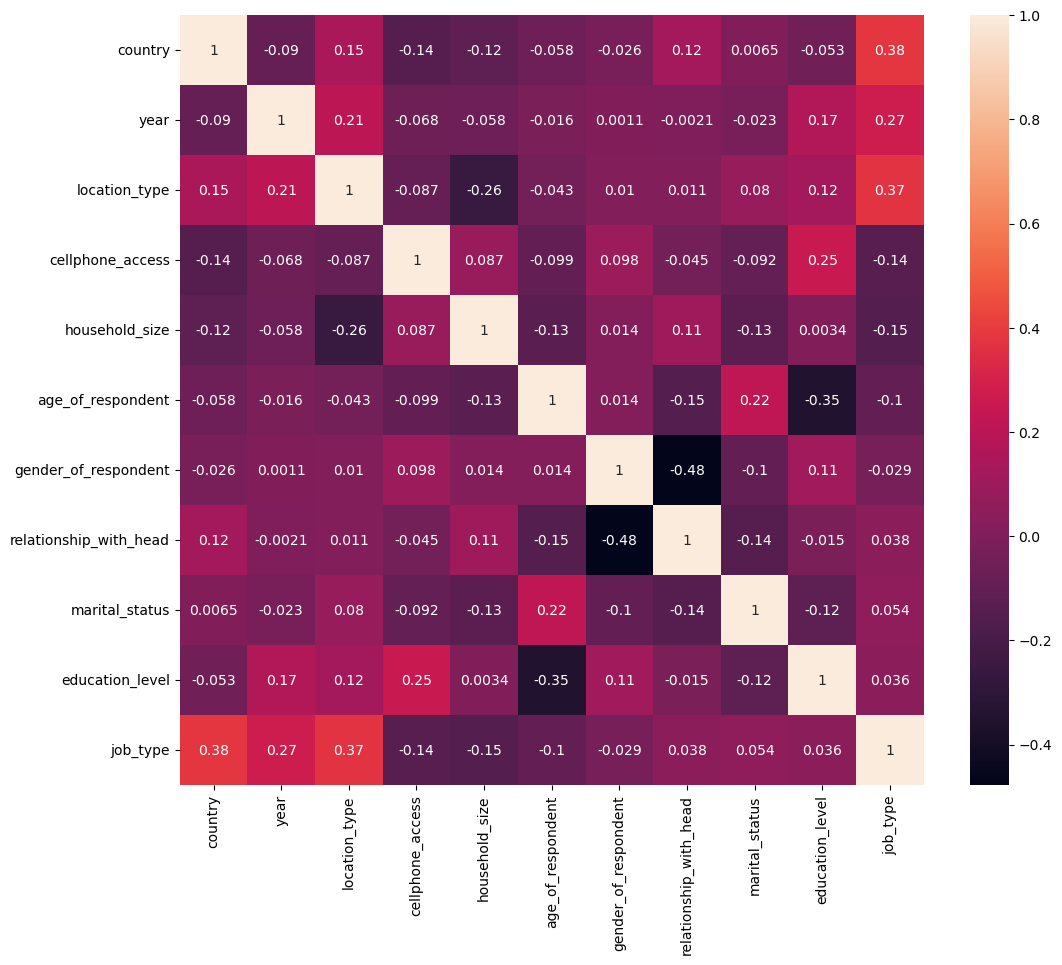

In [17]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
correlation(X_train,0.85)

set()

In [20]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [21]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_val.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_val.shape

((18819, 11), (4705, 11))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)

In [23]:
X_train_scaled

array([[-2.20110398e-01, -1.15240617e+00,  1.24582296e+00, ...,
         6.14264141e-01,  3.53492004e-04, -1.42479319e-01],
       [-2.20110398e-01, -1.15240617e+00, -8.02682266e-01, ...,
        -3.90589551e-01,  8.31899246e-01, -1.42479319e-01],
       [ 8.58040978e-01,  2.63704206e-02,  1.24582296e+00, ...,
         6.14264141e-01,  3.53492004e-04, -1.42479319e-01],
       ...,
       [-1.29826177e+00,  1.20514701e+00, -8.02682266e-01, ...,
         1.61911783e+00,  1.66344500e+00, -1.11455846e+00],
       [-1.29826177e+00,  1.20514701e+00,  1.24582296e+00, ...,
        -3.90589551e-01,  1.66344500e+00,  1.15362621e+00],
       [ 8.58040978e-01,  2.63704206e-02,  1.24582296e+00, ...,
         6.14264141e-01, -1.66273802e+00,  1.15362621e+00]])

C:\Users\USER\AppData\Local\Temp\ipykernel_9060\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

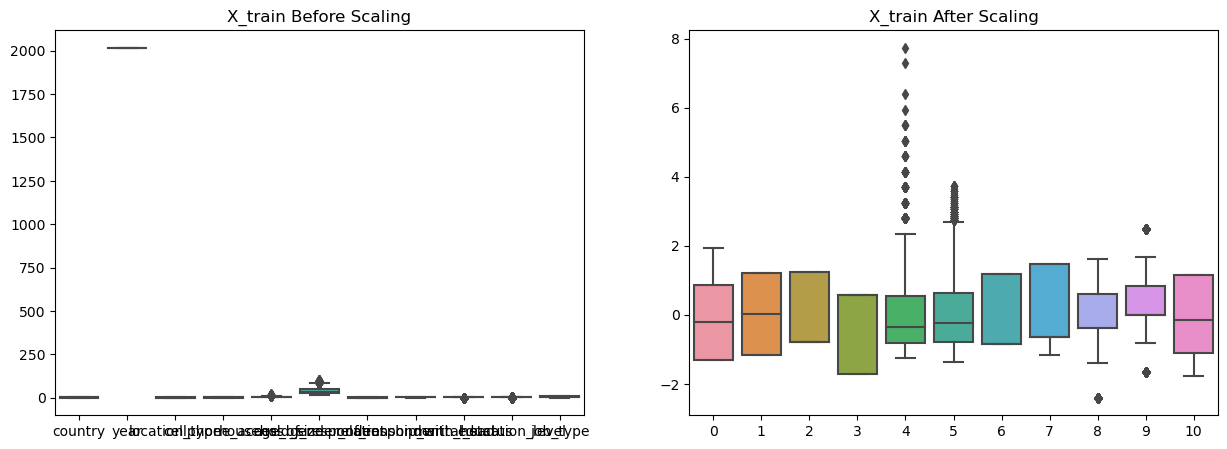

In [24]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
xg_model = XGBClassifier()
xg_model.fit(X_train_scaled,y_train)
y_pred=xg_model.predict(X_val_scaled)
mae=mean_absolute_error(y_val,y_pred)
score=r2_score(y_val,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_val,y_pred)
....

SyntaxError: invalid syntax (1696191459.py, line 12)

In [ ]:
df_test = pd.read_csv('./data/Test.csv')
df_test.shape

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_test['gender_of_respondent']  = Lb.fit_transform(df_test['gender_of_respondent'])
df_test['relationship_with_head']  = Lb.fit_transform(df_test['relationship_with_head'])
df_test['marital_status']  = Lb.fit_transform(df_test['marital_status'])
df_test['education_level']  = Lb.fit_transform(df_test['education_level'])
df_test['job_type']  = Lb.fit_transform(df_test['job_type'])
df_test['country']  = Lb.fit_transform(df_test['country'])
df_test['cellphone_access']  = Lb.fit_transform(df_test['cellphone_access'])
df_test['location_type']  = Lb.fit_transform(df_test['location_type'])

In [ ]:
df_test.head()

In [ ]:
## Feature Selection based on correlaltion
df_test.corr()

In [ ]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=df_test.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df_test,0.85)

In [ ]:
## threshold--Domain expertise
corr_features=correlation(df_test,0.85)

In [ ]:
## threshold--Domain expertise
corr_features=correlation(df_test,0.85)

In [ ]:
## drop features when correlation is more than 0.85 
df_test.drop(corr_features,axis=1,inplace=True)
df_test.shape

In [ ]:
df_test.drop(['uniqueid'],axis = 1,inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_test_scaled=scaler.fit_transform(df_test)
df_test_scaled=scaler.transform(df_test)

In [ ]:
df_test_scaled

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_test)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_test_scaled)
plt.title('X_train After Scaling')

In [ ]:
X_train_scaled.shape

In [ ]:
df_test_scaled.shape

In [ ]:
predicted_class = xg_model.predict(df_test_scaled)

In [ ]:
print(predicted_class)

In [ ]:
df_test = pd.read_csv('./data/Test.csv')
df_test.head()

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": predicted_class})

submission.to_csv('sample_submission.csv', index = False)